# **Load Data**

## Set up Data Path

In [758]:
## Iniitialization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

DATA_PATH = os.getcwd() + '/data/'

## Iniitialization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

DATA_PATH = os.getcwd() + '/data/'

In [759]:
df = pd.read_csv(os.getcwd() + 'final.sales.csv',skipinitialspace=True,low_memory=False)
print('number of rows:'+str(df.shape[0])+'\n'+'number of columns:'+str(df.shape[1]))

number of rows:1264162
number of columns:21


In [760]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264162 entries, 0 to 1264161
Data columns (total 21 columns):
 #   Column                          Non-Null Count    Dtype 
---  ------                          --------------    ----- 
 0   BOROUGH                         1264162 non-null  int64 
 1   NEIGHBORHOOD                    1264162 non-null  object
 2   BUILDING CLASS CATEGORY         1262683 non-null  object
 3   TAX CLASS AT PRESENT            1246996 non-null  object
 4   BLOCK                           1264162 non-null  int64 
 5   LOT                             1264162 non-null  int64 
 6   EASE-MENT                       10 non-null       object
 7   BUILDING CLASS AT PRESENT       1246996 non-null  object
 8   ADDRESS                         1264155 non-null  object
 9   APARTMENT NUMBER                292906 non-null   object
 10  ZIP CODE                        1264162 non-null  int64 
 11  RESIDENTIAL UNITS               1264162 non-null  object
 12  COMMERCIAL UNI

(1264162, 21)

In [761]:
df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,2907,23,NaN,A1,4088 PARK AVENUE,NaN,...,1,0,1,"2,700","1,681",1901,1,A1,$0,3/24/2003
1,2,BATHGATE,01 ONE FAMILY HOMES,1,2917,15,NaN,A1,1848 WASHINGTON AVENUE,NaN,...,1,0,1,"2,943","2,128",1920,1,A1,"$130,000",5/27/2003
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,NaN,A5,412 EAST 179 STREET,NaN,...,1,0,1,"1,842","2,048",1901,1,A1,"$204,000",4/7/2003
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3030,55,NaN,A5,410 EAST 182 STREET,NaN,...,1,0,1,"1,330","1,460",1899,1,A1,"$235,000",7/24/2003
4,2,BATHGATE,01 ONE FAMILY HOMES,1,3035,2,NaN,S1,441 EAST 178 STREET,NaN,...,1,1,2,"1,287","2,378",1899,1,S1,"$125,500",5/2/2003


# **Data Cleaning**

## Edit Column Name

In [762]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

## Reformat Part of Object Columns Contents into Numeric 

In [763]:
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].apply(lambda x: x.replace(',',''))
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].apply(lambda x: x.replace('?',''))
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].apply(lambda x: x.replace(',',''))

df['RESIDENTIAL UNITS']=df['RESIDENTIAL UNITS'].apply(lambda x: x.replace(',',''))
df['COMMERCIAL UNITS']=df['COMMERCIAL UNITS'].apply(lambda x: x.replace(',',''))
df['TOTAL UNITS']=df['TOTAL UNITS'].apply(lambda x: x.replace(',',''))

df['SALE PRICE']=df['SALE PRICE'].apply(lambda x: x.replace('$',''))
df['SALE PRICE']=df['SALE PRICE'].apply(lambda x: x.replace(',',''))
df['SALE PRICE']=df['SALE PRICE'].apply(lambda x: x.replace('-',''))
df['SALE PRICE']=df['SALE PRICE'].apply(lambda x: x.replace('?',''))
df['SALE PRICE'] = df['SALE PRICE'].str.replace(' ', '').str.replace(str(chr(8377)), '').copy()
df['SALE PRICE'].replace('', np.nan, inplace=True)

## Edit Column Type

In [764]:
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].astype(int)
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].astype(int)
df['SALE PRICE']=df['SALE PRICE'].astype(float)

df['RESIDENTIAL UNITS']=df['RESIDENTIAL UNITS'].astype(float)
df['COMMERCIAL UNITS']=df['COMMERCIAL UNITS'].astype(float)
df['TOTAL UNITS']=df['TOTAL UNITS'].astype(float)
df['YEAR BUILT']=df['YEAR BUILT'].astype(int)
df['TAX CLASS AT TIME OF SALE']=df['TAX CLASS AT TIME OF SALE'].astype(int)
df['BOROUGH']=df['BOROUGH'].astype('object')
df['SALE DATE']=df['SALE DATE'].astype('datetime64[ns]')

In [765]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264162 entries, 0 to 1264161
Data columns (total 21 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   BOROUGH                         1264162 non-null  object        
 1   NEIGHBORHOOD                    1264162 non-null  object        
 2   BUILDING CLASS CATEGORY         1262683 non-null  object        
 3   TAX CLASS AT PRESENT            1246996 non-null  object        
 4   BLOCK                           1264162 non-null  int64         
 5   LOT                             1264162 non-null  int64         
 6   EASE-MENT                       10 non-null       object        
 7   BUILDING CLASS AT PRESENT       1246996 non-null  object        
 8   ADDRESS                         1264155 non-null  object        
 9   APARTMENT NUMBER                292906 non-null   object        
 10  ZIP CODE                        1264162 no

## Remove Na/NaN and Unnecessary Columns

In [766]:
df.drop(['EASE-MENT','ADDRESS','APARTMENT NUMBER','BUILDING CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE','NEIGHBORHOOD'], 
        axis = 1, inplace=True)

In [767]:
df.isna().sum()

BOROUGH                          0
BUILDING CLASS CATEGORY       1479
TAX CLASS AT PRESENT         17166
BLOCK                            0
LOT                              0
ZIP CODE                         0
RESIDENTIAL UNITS                0
COMMERCIAL UNITS                 0
TOTAL UNITS                      0
LAND SQUARE FEET                 0
GROSS SQUARE FEET                0
YEAR BUILT                       0
TAX CLASS AT TIME OF SALE        0
SALE PRICE                   25085
SALE DATE                        0
dtype: int64

In [768]:
df = df.dropna()

In [769]:
df.isna().sum()

BOROUGH                      0
BUILDING CLASS CATEGORY      0
TAX CLASS AT PRESENT         0
BLOCK                        0
LOT                          0
ZIP CODE                     0
RESIDENTIAL UNITS            0
COMMERCIAL UNITS             0
TOTAL UNITS                  0
LAND SQUARE FEET             0
GROSS SQUARE FEET            0
YEAR BUILT                   0
TAX CLASS AT TIME OF SALE    0
SALE PRICE                   0
SALE DATE                    0
dtype: int64

In [770]:
df.fillna('NA', inplace=True)
df.isna().sum()

BOROUGH                      0
BUILDING CLASS CATEGORY      0
TAX CLASS AT PRESENT         0
BLOCK                        0
LOT                          0
ZIP CODE                     0
RESIDENTIAL UNITS            0
COMMERCIAL UNITS             0
TOTAL UNITS                  0
LAND SQUARE FEET             0
GROSS SQUARE FEET            0
YEAR BUILT                   0
TAX CLASS AT TIME OF SALE    0
SALE PRICE                   0
SALE DATE                    0
dtype: int64

## Filter Data Values

### Sale Price

In [771]:
# remove data records with zip code < 100000
df = df[df['SALE PRICE']!=0]
df['SALE PRICE'].describe()

count    8.801250e+05
mean     1.124153e+06
std      1.373375e+07
min      1.000000e+00
25%      2.530000e+05
50%      4.500000e+05
75%      7.320000e+05
max      4.111112e+09
Name: SALE PRICE, dtype: float64

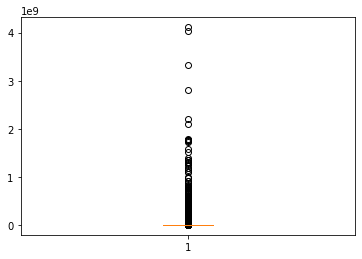

In [772]:
# Plot the distribution of SALE PRICE
plt.boxplot(df['SALE PRICE'])
plt.show()

In [775]:
# we can see that the sales price is highly skewed, decided to remove price which is larger than 2 * 10^9
df = df[df['SALE PRICE']<2*10**9]
df.shape

(880119, 15)

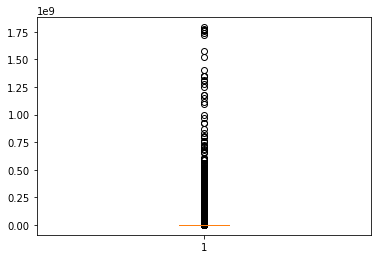

In [776]:
# Plot the distribution of SALE PRICE
plt.boxplot(df['SALE PRICE'])
plt.show()

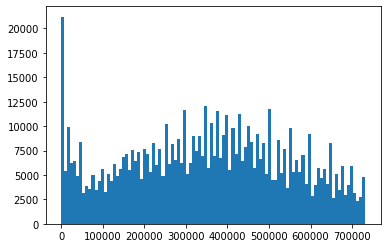

In [777]:
percent_75 = np.percentile(df['SALE PRICE'], 75)
np.percentile(df['SALE PRICE'], 1)
df = df[df['SALE PRICE'] < percent_75]
plt.hist(df['SALE PRICE'], bins= 100)
plt.show()

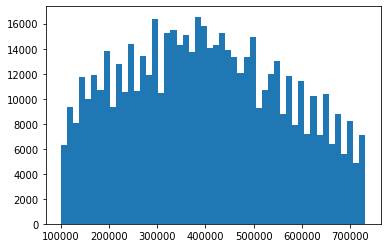

In [778]:
# Remove the records with too low sales price
df = df[df['SALE PRICE']>100000]
plt.hist(df['SALE PRICE'], bins= 50)
plt.show()

### Zip Code & Square Feet

In [779]:
# remove data records with zip code not in new york(less than 10000)
df= df[df['ZIP CODE']>10000]
df= df[df['GROSS SQUARE FEET']>0]
df= df[df['LAND SQUARE FEET']>0]

In [780]:
df['ZIP CODE'].describe()

count    305125.000000
mean      11074.964008
std         440.991162
min       10001.000000
25%       10471.000000
50%       11233.000000
75%       11412.000000
max       11697.000000
Name: ZIP CODE, dtype: float64

In [781]:
df.shape

(305125, 15)

In [785]:
df['ZIP CODE']=df['ZIP CODE'].astype('object')
df['BOROUGH']=df['BOROUGH'].astype('object')

## Data Overview

In [786]:
df.shape

(305125, 15)

In [787]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305125 entries, 1 to 1264160
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   BOROUGH                    305125 non-null  object        
 1   BUILDING CLASS CATEGORY    305125 non-null  object        
 2   TAX CLASS AT PRESENT       305125 non-null  object        
 3   BLOCK                      305125 non-null  int64         
 4   LOT                        305125 non-null  int64         
 5   ZIP CODE                   305125 non-null  object        
 6   RESIDENTIAL UNITS          305125 non-null  float64       
 7   COMMERCIAL UNITS           305125 non-null  float64       
 8   TOTAL UNITS                305125 non-null  float64       
 9   LAND SQUARE FEET           305125 non-null  int32         
 10  GROSS SQUARE FEET          305125 non-null  int32         
 11  YEAR BUILT                 305125 non-null  int32  

In [788]:
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,305125.000000,305125.000000,305125.000000,305125.000000,305125.000000,3.051250e+05,3.051250e+05,305125.000000,305125.000000,305125.000000
mean,6103.239669,59.072292,2.358882,0.113993,2.472652,3.421188e+03,3.226242e+03,1940.581234,1.138861,433053.402399
std,3933.745099,113.396542,17.139739,9.299365,19.642206,5.720136e+04,2.100998e+04,50.752399,0.539880,148320.496182
min,3.000000,1.000000,0.000000,0.000000,0.000000,5.100000e+01,1.000000e+00,0.000000,1.000000,100001.000000
25%,3124.000000,19.000000,1.000000,0.000000,1.000000,2.000000e+03,1.424000e+03,1920.000000,1.000000,325000.000000
50%,5216.000000,38.000000,2.000000,0.000000,2.000000,2.500000e+03,1.900000e+03,1930.000000,1.000000,429000.000000
75%,8909.000000,63.000000,2.000000,0.000000,2.000000,3.240000e+03,2.600000e+03,1955.000000,1.000000,549000.000000
max,16350.000000,7508.000000,1885.000000,4964.000000,4964.000000,1.225343e+07,3.750565e+06,2015.000000,4.000000,731900.000000


# **Exploratory Data Analysis**

## Describe Numeric Data

In [789]:
## Explore numerical features
df.describe(include=[np.number])

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,305125.000000,305125.000000,305125.000000,305125.000000,305125.000000,3.051250e+05,3.051250e+05,305125.000000,305125.000000,305125.000000
mean,6103.239669,59.072292,2.358882,0.113993,2.472652,3.421188e+03,3.226242e+03,1940.581234,1.138861,433053.402399
std,3933.745099,113.396542,17.139739,9.299365,19.642206,5.720136e+04,2.100998e+04,50.752399,0.539880,148320.496182
min,3.000000,1.000000,0.000000,0.000000,0.000000,5.100000e+01,1.000000e+00,0.000000,1.000000,100001.000000
25%,3124.000000,19.000000,1.000000,0.000000,1.000000,2.000000e+03,1.424000e+03,1920.000000,1.000000,325000.000000
50%,5216.000000,38.000000,2.000000,0.000000,2.000000,2.500000e+03,1.900000e+03,1930.000000,1.000000,429000.000000
75%,8909.000000,63.000000,2.000000,0.000000,2.000000,3.240000e+03,2.600000e+03,1955.000000,1.000000,549000.000000
max,16350.000000,7508.000000,1885.000000,4964.000000,4964.000000,1.225343e+07,3.750565e+06,2015.000000,4.000000,731900.000000


In [790]:
col=['BOROUGH','ZIP CODE','BLOCK','LOT','ZIP CODE','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','TAX CLASS AT TIME OF SALE','SALE PRICE']
df[col]


,BOROUGH,ZIP CODE,BLOCK,LOT,ZIP CODE,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
1,2,10457,2917,15,10457,2943,2128,1920,1,130000.0
2,2,10457,3028,25,10457,1842,2048,1901,1,204000.0
3,2,10457,3030,55,10457,1330,1460,1899,1,235000.0
4,2,10457,3035,2,10457,1287,2378,1899,1,125500.0
5,2,10457,3035,52,10457,1782,1548,1899,1,215000.0
...,...,...,...,...,...,...,...,...,...,...
1264154,5,10309,7105,2,10309,6268,2206,2010,1,495846.0
1264156,5,10309,7267,184,10309,2725,2700,1996,1,535000.0
1264157,5,10309,7267,184,10309,2725,2700,1996,1,379000.0
1264158,5,10309,7317,126,10309,11088,2160,1994,1,575000.0


## Describe Categorical Data

In [791]:
df_categorical.describe()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,BUILDING CLASS AT TIME OF SALE
count,423336,423336,423336,423336,423336,423336,423336
unique,5,257,53,11,157,214,236
top,4,FLUSHING-NORTH,10 COOPS - ELEVATOR APARTMENTS,1,D4,11375,D4
freq,164606,13797,103269,199802,102660,9822,102356


In [792]:
df['BOROUGH'].unique()

array([2, 3, 1, 4, 5], dtype=object)

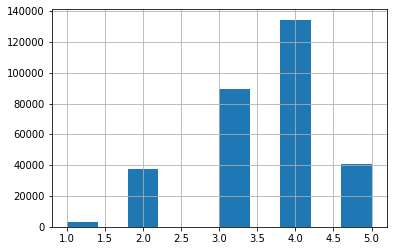

In [793]:
df['BOROUGH'].hist()

In [794]:
df['TAX CLASS AT PRESENT'].unique()

array(['1', '2A', '2B', '4', '2', '2C', '1D'], dtype=object)

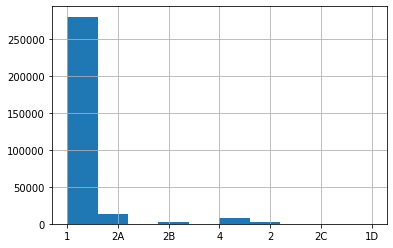

In [795]:
df['TAX CLASS AT PRESENT'].hist()

In [796]:
#  TAX CLASS AT PRESENT
pivot1 = df.groupby("TAX CLASS AT PRESENT")['SALE PRICE'].median()
pivot1

TAX CLASS AT PRESENT
1     425500.0
1D    275000.0
2     341293.0
2A    495000.0
2B    495000.0
2C    411000.0
4     375000.0
Name: SALE PRICE, dtype: float64

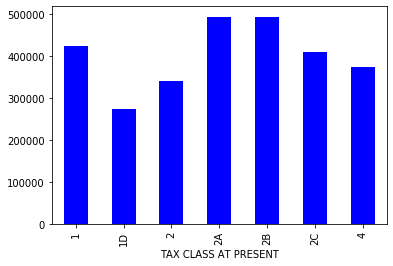

In [797]:
pivot1.plot(kind='bar', color='b')

In [798]:
#  TAX CLASS AT TIME OF SALE
df['TAX CLASS AT TIME OF SALE'].unique()

array([1, 2, 4, 3])

In [799]:
pivot2 = df.groupby('TAX CLASS AT TIME OF SALE')['SALE PRICE'].median()
pivot2

TAX CLASS AT TIME OF SALE
1    425880.0
2    485000.0
3    475000.0
4    365000.0
Name: SALE PRICE, dtype: float64

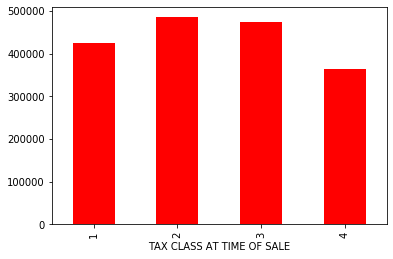

In [800]:
pivot2.plot(kind='bar', color='r')

In [801]:
#BOROUGH
df['BOROUGH'].unique()

array([2, 3, 1, 4, 5], dtype=object)

In [802]:
pivot3_1 = df.groupby('BOROUGH')['SALE PRICE'].median()
pivot3_1

BOROUGH
1    300000.0
2    395000.0
3    450000.0
4    445000.0
5    383000.0
Name: SALE PRICE, dtype: float64

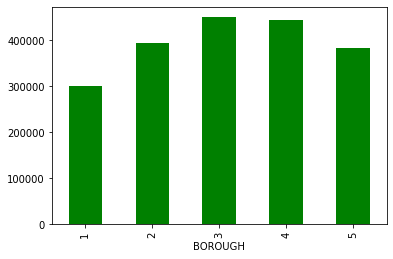

In [803]:
pivot3_1.plot(kind='bar', color='g')

In [804]:
pivot3_2=df.groupby('ZIP CODE')['SALE PRICE'].median()
pivot3_2

ZIP CODE
10001    437500.0
10002    388500.0
10003    392157.0
10004    462000.0
10009    422353.0
           ...   
11692    380000.0
11693    331250.0
11694    510000.0
11696    475000.0
11697    487500.0
Name: SALE PRICE, Length: 178, dtype: float64

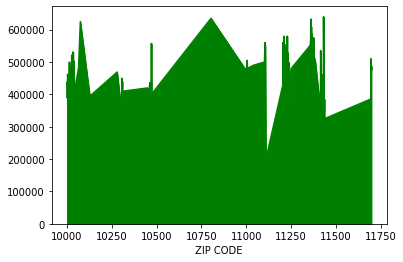

In [805]:
pivot3_2.plot(kind='area',color='green')

In [806]:
#BUILDING CLASS CATEGORY
print(df['BUILDING CLASS CATEGORY'].nunique())

38


In [807]:
pivot4 = df.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].median()
pivot4

BUILDING CLASS CATEGORY
01  ONE FAMILY DWELLINGS                        420000.0
01  ONE FAMILY HOMES                            390000.0
02  TWO FAMILY DWELLINGS                        464449.0
02  TWO FAMILY HOMES                            460000.0
03  THREE FAMILY DWELLINGS                      465000.0
03  THREE FAMILY HOMES                          499500.0
05  TAX CLASS 1 VACANT LAND                     343450.0
06  TAX CLASS 1 - OTHER                         277000.0
07  RENTALS - WALKUP APARTMENTS                 495000.0
08  RENTALS - ELEVATOR APARTMENTS               351109.0
09  COOPS - WALKUP APARTMENTS                   187000.0
10  COOPS - ELEVATOR APARTMENTS                 225000.0
11  SPECIAL CONDO BILLING LOTS                  320000.0
13  CONDOS - ELEVATOR APARTMENTS                575000.0
14  RENTALS - 4-10 UNIT                         495000.0
15  CONDOS - 2-10 UNIT RESIDENTIAL              418706.0
17  CONDO COOPS                                 545280.0
17  CON

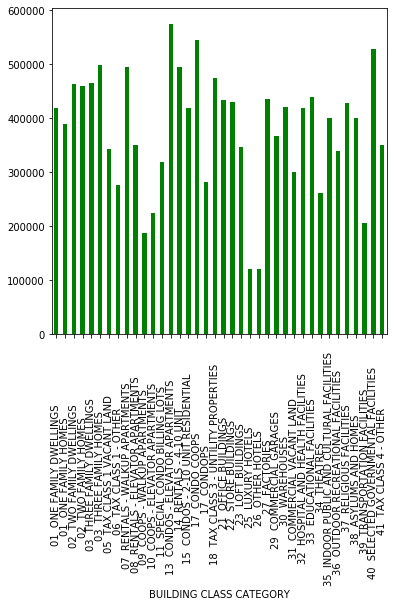

In [808]:
plt.figure(figsize=(6,6))
pivot4.plot(kind='bar', color='Green')

# **Optimized Model Preparation**

## One-Hot Encoding

In [809]:
#Features to be one-hot encoded
one_hot_features = ['BOROUGH', 'ZIP CODE','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE']
#Converting categorical variables into indicator variables
one_hot_encoded = pd.get_dummies(df[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305125 entries, 1 to 1264160
Data columns (total 229 columns):
 #   Column                                                                Non-Null Count   Dtype
---  ------                                                                --------------   -----
 0   TAX CLASS AT TIME OF SALE                                             305125 non-null  int32
 1   BOROUGH_1                                                             305125 non-null  uint8
 2   BOROUGH_2                                                             305125 non-null  uint8
 3   BOROUGH_3                                                             305125 non-null  uint8
 4   BOROUGH_4                                                             305125 non-null  uint8
 5   BOROUGH_5                                                             305125 non-null  uint8
 6   ZIP CODE_10001                                                        305125 non-null  uint8
 7   

In [810]:
# Replacing categorical columns with dummies
fdf = df.drop(one_hot_features,axis=1)
fdf = pd.concat([fdf, one_hot_encoded] ,axis=1)
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305125 entries, 1 to 1264160
Columns: 239 entries, BLOCK to TAX CLASS AT PRESENT_4
dtypes: datetime64[ns](1), float64(4), int32(4), int64(2), uint8(228)
memory usage: 89.6 MB


## Correlation Matrix

In [811]:
correlation_matrix_numerical=df[col].corr(method='pearson')
correlation_matrix_numerical

,BLOCK,LOT,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BLOCK,1.000000,0.022632,0.010660,-0.059624,0.036053,-0.148164,-0.073769
LOT,0.022632,1.000000,0.015197,0.020721,0.059709,-0.029288,-0.031318
LAND SQUARE FEET,0.010660,0.015197,1.000000,0.290578,0.003826,0.021866,-0.004838
GROSS SQUARE FEET,-0.059624,0.020721,0.290578,1.000000,0.037751,0.193374,-0.054991
YEAR BUILT,0.036053,0.059709,0.003826,0.037751,1.000000,-0.010185,0.019992
TAX CLASS AT TIME OF SALE,-0.148164,-0.029288,0.021866,0.193374,-0.010185,1.000000,-0.036949
SALE PRICE,-0.073769,-0.031318,-0.004838,-0.054991,0.019992,-0.036949,1.000000


In [665]:
correlation_matrix_categorical=fdf.corr(method='pearson')
correlation_matrix_categorical

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,TAX CLASS AT TIME OF SALE,...,TAX CLASS AT PRESENT_1A,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_1C,TAX CLASS AT PRESENT_1D,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4
BLOCK,1.000000,-0.200078,0.008718,-0.003513,0.005879,0.025057,-0.003968,0.114899,-0.083791,-0.363868,...,0.025240,0.016452,-0.005945,0.005772,-0.376701,-0.041958,-0.033247,-0.098238,-0.000014,-0.049735
LOT,-0.200078,1.000000,-0.015880,-0.002704,-0.014937,-0.016117,-0.042171,-0.407126,0.038291,0.263576,...,0.258587,-0.027111,0.045050,-0.001157,0.311680,-0.066298,-0.027865,0.105934,-0.001765,0.026249
RESIDENTIAL UNITS,0.008718,-0.015880,1.000000,0.017804,0.883491,0.542706,0.711943,0.011784,0.010888,-0.017696,...,-0.005423,-0.007690,-0.001060,0.258269,-0.022539,0.037276,0.031081,-0.009291,-0.000451,-0.015636
COMMERCIAL UNITS,-0.003513,-0.002704,0.017804,1.000000,0.484094,0.028978,0.040953,0.000812,-0.001129,0.022958,...,-0.001530,-0.000611,-0.000249,0.004432,-0.006789,0.004056,0.003498,-0.001099,-0.000039,0.038361
TOTAL UNITS,0.005879,-0.014937,0.883491,0.484094,1.000000,0.488528,0.642239,0.010508,0.008895,-0.004227,...,-0.005482,-0.007026,-0.001048,0.228104,-0.023009,0.034500,0.028825,-0.008664,-0.000413,0.005099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAX CLASS AT PRESENT_2A,-0.041958,-0.066298,0.037276,0.004056,0.034500,0.002388,0.020697,0.033308,0.072795,0.105677,...,-0.023588,-0.010866,-0.004512,-0.000825,-0.124914,1.000000,-0.009603,-0.021293,-0.000600,-0.024267
TAX CLASS AT PRESENT_2B,-0.033247,-0.027865,0.031081,0.003498,0.028825,0.001081,0.018191,0.008808,0.028346,0.045040,...,-0.009938,-0.004578,-0.001901,-0.000348,-0.052632,-0.009603,1.000000,-0.008972,-0.000253,-0.010225
TAX CLASS AT PRESENT_2C,-0.098238,0.105934,-0.009291,-0.001099,-0.008664,-0.006323,-0.015622,-0.058113,0.037015,0.104849,...,-0.022037,-0.010152,-0.004215,-0.000771,-0.116705,-0.021293,-0.008972,1.000000,-0.000561,-0.022672
TAX CLASS AT PRESENT_3,-0.000014,-0.001765,-0.000451,-0.000039,-0.000413,0.002857,-0.000445,-0.014605,-0.001344,0.009231,...,-0.000621,-0.000286,-0.000119,-0.000022,-0.003290,-0.000600,-0.000253,-0.000561,1.000000,-0.000639


## Numeric Features Heatmap

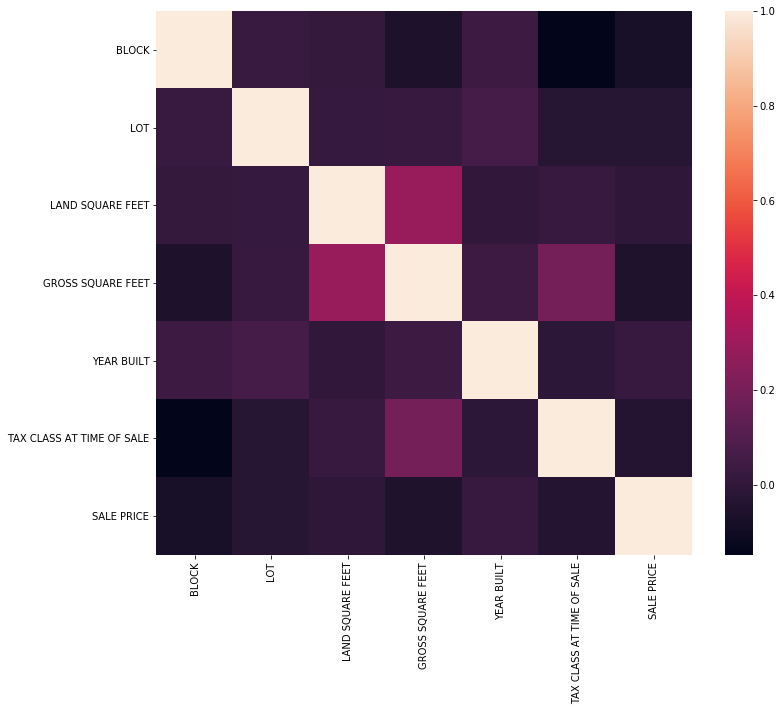

In [812]:
plt.subplots(figsize = (12,10))
sns.heatmap(correlation_matrix_numerical)

# **Optimized Models**

## Data Preview

In [814]:
df=fdf

In [815]:
df.shape

(305125, 239)

In [816]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305125 entries, 1 to 1264160
Columns: 239 entries, BLOCK to TAX CLASS AT PRESENT_4
dtypes: datetime64[ns](1), float64(4), int32(4), int64(2), uint8(228)
memory usage: 89.6 MB


## Create Dataset

In [817]:
df_temp = df.sample(n=int(df.shape[0]*0.1), random_state=1)
# Create dataset
X, y = df_temp.drop(['SALE PRICE', 'SALE DATE'], axis=1), df_temp['SALE PRICE']

## Random Forest

In [818]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

In [819]:
#define MAPE function to calculate mean absolute percentage error
import numpy as np
def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)

In [820]:
rf_regressor = RandomForestRegressor(min_samples_leaf=10)
scores_rf = cross_validate(rf_regressor, X, y, cv=10,
                              scoring=make_scorer(MAPE),
                              return_train_score=True)

In [821]:
print('The mape result for random forest is {}'.format(np.min(scores_rf['test_score'])))

The mape result for random forest is 0.27767110083625185


## Adaboost

In [675]:
from sklearn.ensemble import AdaBoostRegressor

In [676]:
regr = AdaBoostRegressor(random_state=0, n_estimators=500)
scores_adaboost = cross_validate(regr, X, y, cv=5,
                              scoring=make_scorer(MAPE),
                              return_train_score=True)

In [677]:
print('The best score for Adaboost is {}'.format(np.min(scores_adaboost['test_score'])))

The best score for Adaboost is 0.3875743410160269


## Lightgbm

In [678]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbm = lgb.LGBMRegressor(num_leaves=1000,
                        learning_rate=0.01,
                        n_estimators=300)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
       early_stopping_rounds=100)

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# eval
print('The mape of prediction is:', MAPE(y_test, y_pred))

[1]	valid_0's l1: 136432	valid_0's l2: 2.63952e+10
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 135804	valid_0's l2: 2.61535e+10
[3]	valid_0's l1: 135183	valid_0's l2: 2.59167e+10
[4]	valid_0's l1: 134572	valid_0's l2: 2.56844e+10
[5]	valid_0's l1: 133967	valid_0's l2: 2.54574e+10
[6]	valid_0's l1: 133369	valid_0's l2: 2.52341e+10
[7]	valid_0's l1: 132780	valid_0's l2: 2.50165e+10
[8]	valid_0's l1: 132199	valid_0's l2: 2.48028e+10
[9]	valid_0's l1: 131626	valid_0's l2: 2.45926e+10
[10]	valid_0's l1: 131059	valid_0's l2: 2.43853e+10
[11]	valid_0's l1: 130506	valid_0's l2: 2.41849e+10
[12]	valid_0's l1: 129954	valid_0's l2: 2.39867e+10
[13]	valid_0's l1: 129415	valid_0's l2: 2.37935e+10
[14]	valid_0's l1: 128878	valid_0's l2: 2.36027e+10
[15]	valid_0's l1: 128354	valid_0's l2: 2.34174e+10
[16]	valid_0's l1: 127834	valid_0's l2: 2.32351e+10
[17]	valid_0's l1: 127324	valid_0's l2: 2.30574e+10
[18]	valid_0's l1: 126819	valid_0's l2: 2.28836e+10
[19]	valid_

## XGBoost

### Build MAE & MAPE Functions

In [679]:
import numpy as np
def xgboost_MAE(pred,  dtrain: xgb.DMatrix):
    true = dtrain.get_label()
    diff = np.abs(np.array(true) - np.array(pred))
    return 'mae', float(np.mean(diff))

def xgboost__MAPE(pred,  dtrain: xgb.DMatrix):
    true = dtrain.get_label()
    diff = np.abs(np.array(true) - np.array(pred))
    return 'mape', float(np.exp(np.mean(diff))-1)
 

### Calculate MAE of Original Price

In [849]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
clf = xgb.XGBRegressor(learning_rate=0.04,
                  n_estimators=600,
                  max_depth=5, colsample_bylevel=0.9)

In [850]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric=xgboost_MAE,
        verbose=True )

print('Starting predicting...')
# predict
y_pred = clf.predict(X_test)
# eval
mae = mean_absolute_error(y_test, y_pred)
print('The MAE of predictions on original sales price are:',mae)

[0]	validation_0-rmse:442550.12500	validation_1-rmse:441586.50000	validation_0-mae:417243.43750	validation_1-mae:416067.40625
[1]	validation_0-rmse:426440.09375	validation_1-rmse:425496.50000	validation_0-mae:400572.93750	validation_1-mae:399381.09375
[2]	validation_0-rmse:411016.90625	validation_1-rmse:410108.96875	validation_0-mae:384566.06250	validation_1-mae:383374.50000
[3]	validation_0-rmse:396272.09375	validation_1-rmse:395413.90625	validation_0-mae:369196.81250	validation_1-mae:368014.53125
[4]	validation_0-rmse:382166.93750	validation_1-rmse:381355.53125	validation_0-mae:354443.12500	validation_1-mae:353274.81250
[5]	validation_0-rmse:368688.18750	validation_1-rmse:367923.59375	validation_0-mae:340288.28125	validation_1-mae:339119.28125
[6]	validation_0-rmse:355812.53125	validation_1-rmse:355103.37500	validation_0-mae:326737.12500	validation_1-mae:325591.18750
[7]	validation_0-rmse:343508.53125	validation_1-rmse:342844.46875	validation_0-mae:313798.03125	validation_1-mae:31264

### Calculate MAE on Log Price ( MAPE on Original Price)

In [851]:
X_train, X_test, ylg_train, ylg_test = train_test_split(X, np.log(y), test_size=0.2, random_state=42)
clf.fit(X_train, ylg_train,
        eval_set=[(X_train, ylg_train), (X_test, ylg_test)],
        eval_metric=xgboost__MAPE,
        verbose=True )

print('Starting predicting...')
# predict
ylg_pred = clf.predict(X_test)
# eval
mae_logpx =mean_absolute_error(ylg_test, ylg_pred)
print('The mae of log prices are:',mae_logpx)

[0]	validation_0-rmse:11.92261	validation_1-rmse:11.91886	validation_0-mape:149656.03125	validation_1-mape:149073.98438
[1]	validation_0-rmse:11.44626	validation_1-rmse:11.44251	validation_0-mape:92917.49219	validation_1-mape:92556.03125
[2]	validation_0-rmse:10.98898	validation_1-rmse:10.98528	validation_0-mape:58802.32031	validation_1-mape:58576.08594
[3]	validation_0-rmse:10.55000	validation_1-rmse:10.54638	validation_0-mape:37899.76172	validation_1-mape:37756.57422
[4]	validation_0-rmse:10.12860	validation_1-rmse:10.12502	validation_0-mape:24860.30859	validation_1-mape:24767.09180
[5]	validation_0-rmse:9.72409	validation_1-rmse:9.72058	validation_0-mape:16584.33594	validation_1-mape:16523.36328
[6]	validation_0-rmse:9.33577	validation_1-rmse:9.33232	validation_0-mape:11243.89062	validation_1-mape:11203.11719
[7]	validation_0-rmse:8.96301	validation_1-rmse:8.95959	validation_0-mape:7742.49170	validation_1-mape:7714.60547
[8]	validation_0-rmse:8.60519	validation_1-rmse:8.60184	valida

# **Conclusion**

We tried four models on the real estate sales price dataset. After being cleaned, the dataset contains more than 40k pieces of data with around 300 features. Measures taken in order to gain better performance include adjusting paramters, passing in customized evaluation functions, computing log on original price etc. 

The best performance acheived by our models is around MAE of 70k dollars, MAPE of 0.25. 